In [4]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from datetime import datetime
import requests
from config import weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?"

#API URL
city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=imperial"

# Make a 'Get' request for the city weather.
weather_response = requests.get(city_url)

# Convert to json
weather_json = weather_response.json()

# API Test
weather_json.get("main")


{'temp': 83.16,
 'feels_like': 89.28,
 'temp_min': 83.16,
 'temp_max': 83.16,
 'pressure': 1014,
 'humidity': 72,
 'sea_level': 1014,
 'grnd_level': 1014}

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        # Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "q=" + cities[i] + "&appid=" + weather_api_key + "&units=imperial"
       
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kimbe
Processing Record 2 of Set 1 | keningau
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | yorosso
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | nantucket
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | airai
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | cape town
Processing Record 12 of Set 1 | gornopravdinsk
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | la ronge
Processing Record 15 of Set 1 | svetlaya
Processing Record 16 of Set 1 | mayumba
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | oume
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | fort-shevchenko
Processing Record 22 of Set 1 | puerto ayora
Processing Record 23 of Set 1 | srinagar

Processing Record 39 of Set 4 | slobidka
Processing Record 40 of Set 4 | eregli
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | bridgewater
Processing Record 43 of Set 4 | pacific grove
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | narasannapeta
Processing Record 46 of Set 4 | munster
Processing Record 47 of Set 4 | norman wells
Processing Record 48 of Set 4 | yangjiang
Processing Record 49 of Set 4 | tura
Processing Record 50 of Set 4 | coquimbo
Processing Record 1 of Set 5 | tuburan
Processing Record 2 of Set 5 | vestmannaeyjar
Processing Record 3 of Set 5 | chikwawa
Processing Record 4 of Set 5 | nome
Processing Record 5 of Set 5 | moindou
Processing Record 6 of Set 5 | zambezi
Processing Record 7 of Set 5 | vila franca do campo
Processing Record 8 of Set 5 | hunza
City not found. Skipping...
Processing Record 9 of Set 5 | paka
Processing Record 10 of Set 5 | mackay
Processing Record 11 of Set 5 | staritsa
Processing Record 12 of Se

Processing Record 28 of Set 8 | saleaula
City not found. Skipping...
Processing Record 29 of Set 8 | tortoli
Processing Record 30 of Set 8 | narsaq
Processing Record 31 of Set 8 | shubarkuduk
Processing Record 32 of Set 8 | dunedin
Processing Record 33 of Set 8 | sorong
Processing Record 34 of Set 8 | fukue
Processing Record 35 of Set 8 | nouadhibou
Processing Record 36 of Set 8 | dumai
Processing Record 37 of Set 8 | satitoa
City not found. Skipping...
Processing Record 38 of Set 8 | gumla
Processing Record 39 of Set 8 | shchelyayur
City not found. Skipping...
Processing Record 40 of Set 8 | marienburg
Processing Record 41 of Set 8 | nagato
Processing Record 42 of Set 8 | gamba
Processing Record 43 of Set 8 | belmonte
Processing Record 44 of Set 8 | ha giang
Processing Record 45 of Set 8 | lasa
Processing Record 46 of Set 8 | obo
Processing Record 47 of Set 8 | jacmel
Processing Record 48 of Set 8 | daura
Processing Record 49 of Set 8 | talaya
Processing Record 50 of Set 8 | mpika
Pro

Processing Record 18 of Set 12 | brindisi
Processing Record 19 of Set 12 | jacareacanga
Processing Record 20 of Set 12 | anuchino
Processing Record 21 of Set 12 | ambilobe
Processing Record 22 of Set 12 | paamiut
Processing Record 23 of Set 12 | adrar
Processing Record 24 of Set 12 | manzhouli
Processing Record 25 of Set 12 | wanaka
Processing Record 26 of Set 12 | troitsko-pechorsk
Processing Record 27 of Set 12 | sarakhs
Processing Record 28 of Set 12 | sorvag
City not found. Skipping...
Processing Record 29 of Set 12 | nemuro
Processing Record 30 of Set 12 | visnes
Processing Record 31 of Set 12 | singarayakonda
Processing Record 32 of Set 12 | vila
Processing Record 33 of Set 12 | freeport
Processing Record 34 of Set 12 | cabedelo
Processing Record 35 of Set 12 | muswellbrook
Processing Record 36 of Set 12 | bangangte
Processing Record 37 of Set 12 | filadelfia
Processing Record 38 of Set 12 | tongliao
Processing Record 39 of Set 12 | punta cardon
Processing Record 40 of Set 12 | b

In [10]:
len(city_data)

574

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kimbe,-5.5502,150.1429,75.56,92,72,4.52,PG,2021-07-26 12:43:07
1,Keningau,5.3378,116.1602,82.85,92,100,1.50,MY,2021-07-26 12:42:10
2,Avarua,-21.2078,-159.7750,77.05,88,75,13.80,CK,2021-07-26 12:43:07
3,Busselton,-33.6500,115.3333,55.09,83,84,31.14,AU,2021-07-26 12:43:07
4,Yorosso,12.3536,-4.7761,93.04,41,74,7.43,ML,2021-07-26 12:43:08
5,Hasaki,35.7333,140.8333,75.60,88,100,31.50,JP,2021-07-26 12:43:08
6,Nantucket,41.2835,-70.0995,75.96,95,90,11.50,US,2021-07-26 12:38:28
7,Ushuaia,-54.8000,-68.3000,31.66,100,90,3.44,AR,2021-07-26 12:41:15
8,Airai,-8.9266,125.4092,57.74,88,50,2.55,TL,2021-07-26 12:43:08
9,Cherskiy,68.7500,161.3000,39.36,76,0,10.80,RU,2021-07-26 12:43:09


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kimbe,PG,2021-07-26 12:43:07,-5.5502,150.1429,75.56,92,72,4.52
1,Keningau,MY,2021-07-26 12:42:10,5.3378,116.1602,82.85,92,100,1.50
2,Avarua,CK,2021-07-26 12:43:07,-21.2078,-159.7750,77.05,88,75,13.80
3,Busselton,AU,2021-07-26 12:43:07,-33.6500,115.3333,55.09,83,84,31.14
4,Yorosso,ML,2021-07-26 12:43:08,12.3536,-4.7761,93.04,41,74,7.43
...,...,...,...,...,...,...,...,...,...
569,Mvuma,ZW,2021-07-26 12:45:34,-19.2792,30.5283,55.15,53,54,11.36
570,Araouane,ML,2021-07-26 12:45:35,18.9048,-3.5265,104.34,23,16,15.39
571,Chicama,PE,2021-07-26 12:45:35,-7.8447,-79.1469,63.14,83,15,4.76
572,Huamuxtitlan,MX,2021-07-26 12:45:35,17.8167,-98.5667,67.68,90,60,1.68


In [13]:
# Create the output file (CSV).
output_data_file = "../World_Weather_Analysis/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

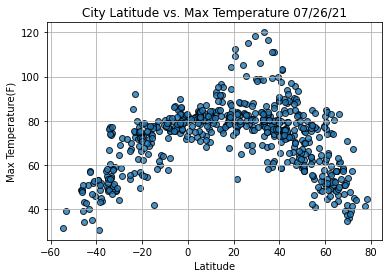

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../World_Weather_Analysis/ Fig1.png")

# Show plot.
plt.show()




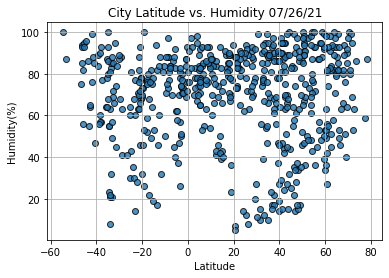

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black",
            linewidths=1,
            marker="o",
            alpha=0.8,
            label="Cities")
# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../World_Weather_Analysis/ Fig2.png")

# Show plot.
plt.show()


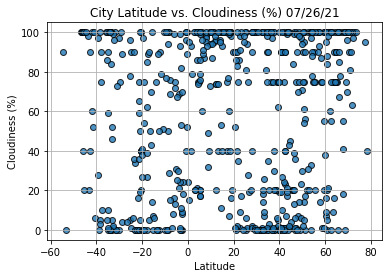

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig3.png")

# Show plot.
plt.show()

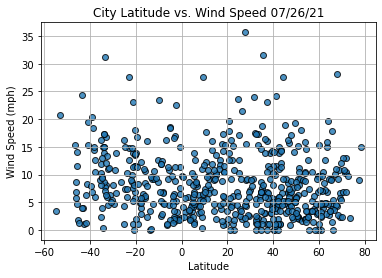

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("../World_Weather_Analysis/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import stats


In [37]:
# Create a function to create perform linear regression on the weather data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
  
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")

    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [38]:
index13 = city_data_df.loc[13]
index13

City                     La Ronge
Country                        CA
Date          2021-07-26 12:43:10
Lat                       55.1001
Lng                     -105.2842
Max Temp                    53.82
Humidity                       93
Cloudiness                     90
Wind Speed                    2.3
Name: 13, dtype: object

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Keningau,MY,2021-07-26 12:42:10,5.3378,116.1602,82.85,92,100,1.50
4,Yorosso,ML,2021-07-26 12:43:08,12.3536,-4.7761,93.04,41,74,7.43
5,Hasaki,JP,2021-07-26 12:43:08,35.7333,140.8333,75.60,88,100,31.50
6,Nantucket,US,2021-07-26 12:38:28,41.2835,-70.0995,75.96,95,90,11.50
9,Cherskiy,RU,2021-07-26 12:43:09,68.7500,161.3000,39.36,76,0,10.80


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


In [42]:
# Call the function.
linregress(x_values, y_values)
                      #"Linear Regression on the Northern Hemisphere \
                       # for Maximum Temperature", "Max Temp",(10,40))

LinregressResult(slope=-0.4397148976353131, intercept=91.01958426376329, rvalue=-0.5817623263560754, pvalue=3.788775249332283e-37, stderr=0.031010695006266416, intercept_stderr=1.318433876931605)

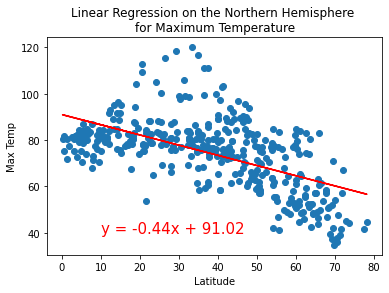

In [43]:
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,40))


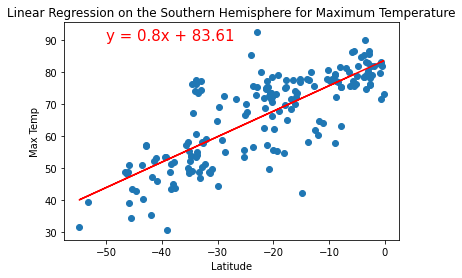

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

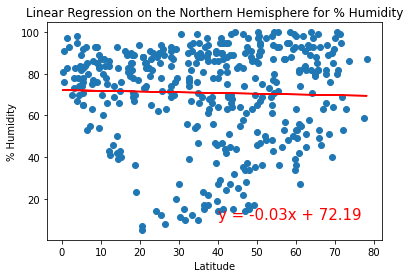

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(40,10))

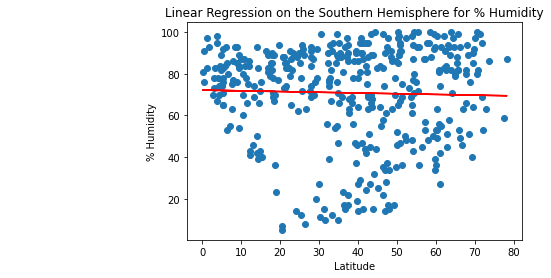

In [48]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-50,15))

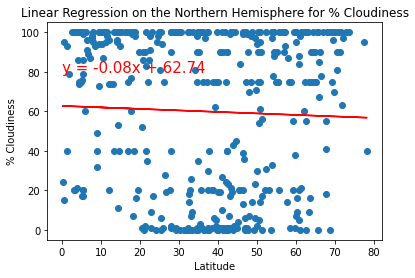

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness',
                       '% Cloudiness',(0,80))

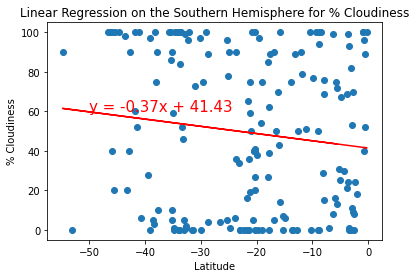

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-50,60))

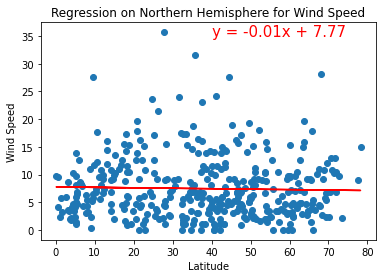

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Regression on Northern Hemisphere for Wind Speed",
                      "Wind Speed", (40,35))

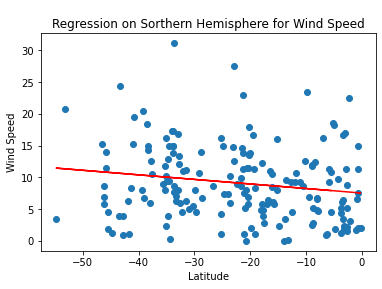

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      "Regression on Sorthern Hemisphere for Wind Speed",
                      "Wind Speed", (-50,35))